ここではair_visit_data.csvとsample_submission.csvのみを基にしてFbprophetを使って予測値を出してみます。
Google Colaboratoryを使うことを念頭に置いています。(Fbprophetのインストールが楽なため。)

In [ ]:
#ライブラリをインポート
import pandas as pd
from fbprophet import Prophet

In [ ]:
#CSVファイル読み込み。
df_train = pd.read_csv('/content/air_visit_data.csv')
df_train.head()

In [ ]:
#air_store_idと日付ごとにvisitorsをまとめる。
df = df_train.groupby(['air_store_id','visit_date']).sum()
df = df.reset_index()
df

In [ ]:
#特定のidのデータだけ抽出できるか確認。
groups = df.groupby(df.air_store_id)
ms_df = groups.get_group("air_00a91d42b08b08d9")
ms_df

In [ ]:
#CSVファイル読み込み。下図の様になるようにVS codeで調整しておきます。
df_test = pd.read_csv('/content/sample_submission.csv')
df_test

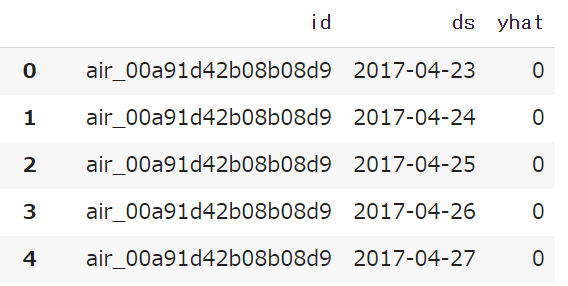

In [ ]:
#idのリストを作成する。
id_list_test = df_test.loc[:,['id']]
id_list_test = id_list_test.drop_duplicates()
id_list_test

In [ ]:
#特定のidのデータだけ抽出できるか確認。
groups_test = df_test.groupby(df_test.id)
ms_df_test = groups_test.get_group("air_00a91d42b08b08d9")
ms_df_test

In [ ]:
header = df_test.head(0)
#全てのidに対する予測値の空のテーブルを作成しておく。
table = header
table

In [ ]:
for i in id_list_test['id']:
  #各idのデータを抽出。
  C = groups.get_group(i)
  C = C.loc[:,['visit_date','visitors']]
　#Fbprophetを使える列名に変更。
  D = C.rename(columns={'visit_date':'ds'})
  D = D.rename(columns={'visitors':'y'})
  #Fbprophetモデルを使って学習。
  D.columns = ['ds','y']
  a = Prophet()
  a.fit(D)
  #予測対象とする各idに対するテーブルを作成。
  C_test = groups_test.get_group(i)
  C_test = C_test.loc[:,['ds']]
  #各idに対し予測実行。
  expect = a.predict(C_test)
  expect = expect.loc[:,['ds','yhat']]
  # idの列を追加。
  expect['id'] = i
  expect = expect.reindex(columns=['id','ds','yhat'])
  #全てのidに対する予測値のテーブルに追加。
  table = table.append(expect)

In [ ]:
#予測値を整数にする。
x = len(table['yhat'])
table=table.reset_index()
i = 0
while i <= x-1:
  table['yhat'][i] = int(table['yhat'][i])
  i = i+1

In [ ]:
result = table.loc[:,['id','ds','yhat']]
result.to_csv('/content/predict.csv', index=False, encoding="SHIFT-JISx0213")
#この後にVS codeを使って元のsample_submissionと同じテーブル構造にしてサブミット。

この結果をサブミットしてみたところ、Score:0.53690,Private score:0.58669でした。